In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
with open('results/no_overlap.pkl', 'rb') as file:
    results = pickle.load(file)

print("Results keys:", results.keys())
single_shot_results = results['single_shot']
ar_results = results['auto_regressive']

# Check dimensions
print("Single-shot Results dimensions:", [np.array(x).shape for x in single_shot_results])
print("Auto-regressive Results dimensions:", [np.array(x).shape for x in ar_results])

Results keys: dict_keys(['single_shot', 'auto_regressive'])
Single-shot Results dimensions: [(), (), (), (), (2, 2, 10, 13), (2, 10, 26), (2, 10, 26)]
Auto-regressive Results dimensions: [(), (), (), (), (2, 2, 10, 13), (2, 2, 10, 13), (2, 2, 10, 13)]


In [13]:
def separate_data(data, feature_index=0):
    # Convert to numpy array if not already
    data = np.array(data)
    
    # Assuming the second dimension (index 1) represents the feature (temperature, GHG)
    temperature_data = data[:, feature_index, :, :]
    ghg_data = data[:, 1 - feature_index, :, :]  # Assuming there are only two features
    return temperature_data, ghg_data


In [14]:
# Parse the data for single-shot model
ss_inputs, ss_predictions, ss_targets = results['single_shot'][4], results['single_shot'][5], results['single_shot'][6]
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)

# Convert lists to numpy arrays
ss_inputs = np.array(results['single_shot'][4])
ss_predictions = np.array(results['single_shot'][5])
ss_targets = np.array(results['single_shot'][6])

# Separate the data
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)
ss_pred_temp = ss_predictions[:, :, :13]  # Assuming first 13 features are temperature
ss_pred_ghg = ss_predictions[:, :, 13:]   # Assuming next 13 features are GHG emissions
ss_target_temp = ss_targets[:, :, :13]
ss_target_ghg = ss_targets[:, :, 13:]

# Check the dimensions to ensure everything is correct
print("ss_input_temp shape:", ss_input_temp.shape)
print("ss_input_ghg shape:", ss_input_ghg.shape)
print("ss_pred_temp shape:", ss_pred_temp.shape)
print("ss_pred_ghg shape:", ss_pred_ghg.shape)
print("ss_target_temp shape:", ss_target_temp.shape)
print("ss_target_ghg shape:", ss_target_ghg.shape)

ss_input_temp shape: (2, 10, 13)
ss_input_ghg shape: (2, 10, 13)
ss_pred_temp shape: (2, 10, 13)
ss_pred_ghg shape: (2, 10, 13)
ss_target_temp shape: (2, 10, 13)
ss_target_ghg shape: (2, 10, 13)


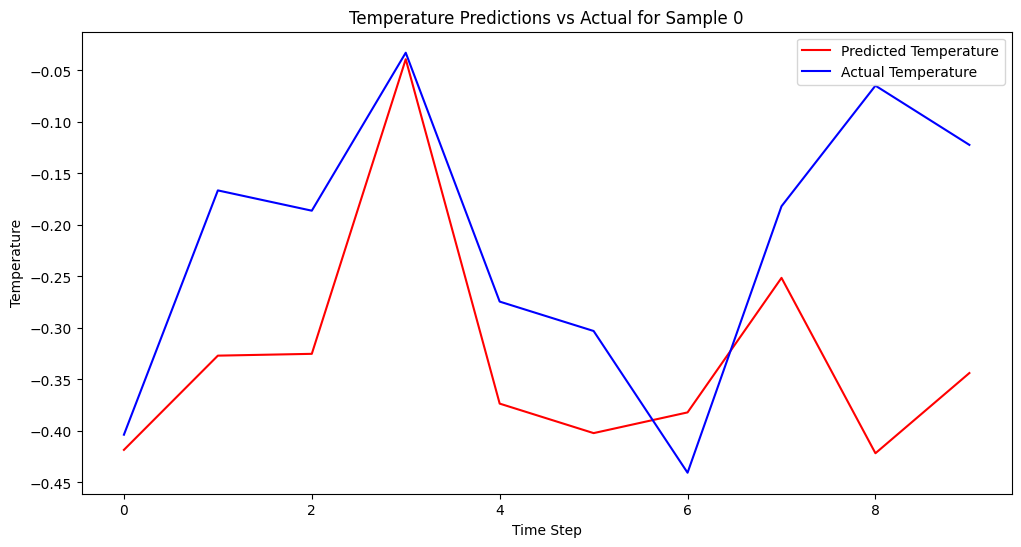

In [20]:
# Select a random sample or location
random_index = 0

# Plot the predicted vs. actual temperature for the selected sample
plt.figure(figsize=(12, 6))
time_steps = np.arange(ss_input_temp.shape[1])  # Assuming the second dimension represents time steps

# Assuming you want to plot for the first location/time step as an example
plt.plot(time_steps, ss_pred_temp[random_index, :, 0], 'r-', label='Predicted Temperature')
plt.plot(time_steps, ss_target_temp[random_index, :, 0], 'b-', label='Actual Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.title(f'Temperature Predictions vs Actual for Sample {random_index}')
plt.legend()
plt.show()
